# Data on US Honey Production in years 1995-2021 - visualization

## Introduction

__Bees__ are fascinating - if you have not heard about "the bee waggle dance" you should probably check it out.

> https://askabiologist.asu.edu/bee-dance-game/introduction.html

Altogether with other __pollinators__, bees are also crucial to the livelihood of us, humans, and other animals - as we all depend on plants as a source of our food.

One sweet byproduct of bees' pollinating activity is __honey__ - although you should also know, that very few bee species produce honey!

Worldwide, more than __16,000 species of bees__ are known. Contrary to the common belief, ca. 90% of them are __solitary__!

Now let us take a look at honey production in the US in the years 1995-2021.


## Setup

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

I will be working with the following dataset:

> https://www.kaggle.com/datasets/mohitpoudel/us-honey-production-19952021

In [2]:
filepath = "../input/us-honey-production-19952021/US_honey_dataset_updated.csv"
df = pd.read_csv(filepath, index_col="Unnamed: 0")

In [3]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


If you take a close look at the above dataset, you can notice that some values look suspicious.
That is why I created a function to make it more consistent. 
You can find a detailed description of how I analyzed the correctness of this dataset in my other notebook: fix_US_honey_dataset.

In [4]:
def fix_us_honey_dataset(df_wrong):
    """
    Fix the kaggle dataset on US Honey Production 1995-2021.
    """
    
    df_wrong['average_price_v2'] = df_wrong['average_price']
    df_wrong.loc[df['year'] > 2017, 'average_price_v2'] = df_wrong['average_price'].apply(lambda x: x*100)
    
    df_wrong['production_v2'] = df['production']
    df_wrong.loc[df_wrong['production'] == df_wrong['stocks'], 'production_v2'] = df_wrong['colonies_number'] * df_wrong['yield_per_colony']
    
    df_wrong['value_of_production_v2'] = (df_wrong['production_v2'] * df_wrong['average_price_v2'] / 100).round(-3).astype(int)
    
    df_correct = df_wrong[['state', 'colonies_number', 'yield_per_colony', 'production_v2', 'stocks', 'average_price_v2', 'value_of_production_v2', 'year']]
    df_correct.columns = ['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks', 'average_price', 'value_of_production', 'year']
    
    return df_correct

In [5]:
df = fix_us_honey_dataset(df)

In [6]:
# helper function
def neat_describe(df):
    """
    Apply dtypes of the input DataFrame to the output of .describe() to make it more readable
    """
    df_dtypes_num = df.select_dtypes(include='number').dtypes.to_dict()
    price_cols = {}
    for column in df.columns:
        if 'price' in column:
            price_cols[column] = 0
    return df.describe().astype(df_dtypes_num).round(price_cols)

## Data characteristics

In [7]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [8]:
df.tail()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1110,Virginia,6000,40,240000,79000,823.0,1975000,2021
1111,Washington,96000,32,3072000,1206000,252.0,7741000,2021
1112,WestVirginia,6000,43,258000,136000,480.0,1238000,2021
1113,Wisconsin,42000,47,1974000,750000,281.0,5547000,2021
1114,Wyoming,38000,58,2204000,242000,207.0,4562000,2021


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 110.7+ KB


In [10]:
neat_describe(df)

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115,1115,1115,1115,1115.0,1115,1115
mean,62438,59,4101441,1172625,185.0,5667389,2007
std,92648,19,6782002,2049555,117.0,9459453,7
min,2000,19,84000,9000,49.0,106000,1995
25%,9000,45,485000,112500,102.0,1008000,2001
50%,26000,57,1520000,370000,155.0,2281000,2008
75%,69000,71,3996000,1253500,223.0,5704000,2015
max,550000,155,46410000,13545000,874.0,83859000,2021


### Data normalization

Such variables as colonies number, production, stocks and value of production, might depend, among other factors, on the size of a state. 
In our dataset, they are displayed in absolute numbers. It may be worth to normalize these values.

In order to do that, I added data on the size of the states, which I am going to import and merge with our main dataframe.

In [11]:
filepath_2 = "../input/us-states-area/us_states_area.csv"
df_states = pd.read_csv(filepath_2, index_col='state')
df_states.head()

,area_sq_mi
state,
Alabama,52423
Alaska,656425
Arizona,114006
Arkansas,53182
California,163707


In [12]:
df = df.merge(df_states, how='left', on='state') 
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,area_sq_mi
0,Alabama,16000,58,928000,28000,62.0,575000,1995,52423
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,114006
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,53182
3,California,420000,93,39060000,4687000,60.0,23436000,1995,163707
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,104100


In [13]:
df['colonies_number_norm'] = (df['colonies_number'] / df['area_sq_mi'] * 1000).round(0).astype(int)

df['production_norm'] = (df['production'] / df['area_sq_mi'] * 1000).round(0).astype(int)

df['stocks_norm'] = (df['stocks'] / df['area_sq_mi'] * 1000).round(0).astype(int)

df['value_of_production_norm'] = (df['value_of_production'] / df['area_sq_mi'] * 1000).round(0).astype(int)

df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,area_sq_mi,colonies_number_norm,production_norm,stocks_norm,value_of_production_norm
0,Alabama,16000,58,928000,28000,62.0,575000,1995,52423,305,17702,534,10968
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,114006,456,36033,8649,24499
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,53182,940,56410,16923,36102
3,California,420000,93,39060000,4687000,60.0,23436000,1995,163707,2566,238597,28630,143158
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,104100,432,25937,13487,17637


In [14]:
neat_describe(df)

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,area_sq_mi,colonies_number_norm,production_norm,stocks_norm,value_of_production_norm
count,1115,1115,1115,1115,1115.0,1115,1115,1115,1115,1115,1115,1115
mean,62438,59,4101441,1172625,185.0,5667389,2007,71135,830,54790,15422,80173
std,92648,19,6782002,2049555,117.0,9459453,7,45692,1073,84248,25162,123697
min,2000,19,84000,9000,49.0,106000,1995,8722,41,2017,248,2270
25%,9000,45,485000,112500,102.0,1008000,2001,44828,227,11061,2509,19553
50%,26000,57,1520000,370000,155.0,2281000,2008,59441,462,27484,6931,40681
75%,69000,71,3996000,1253500,223.0,5704000,2015,84904,979,58059,17299,88526
max,550000,155,46410000,13545000,874.0,83859000,2021,268601,7779,656399,188674,1186057


## Data visualization


### Distribution

<AxesSubplot:xlabel='value_of_production_norm', ylabel='Count'>

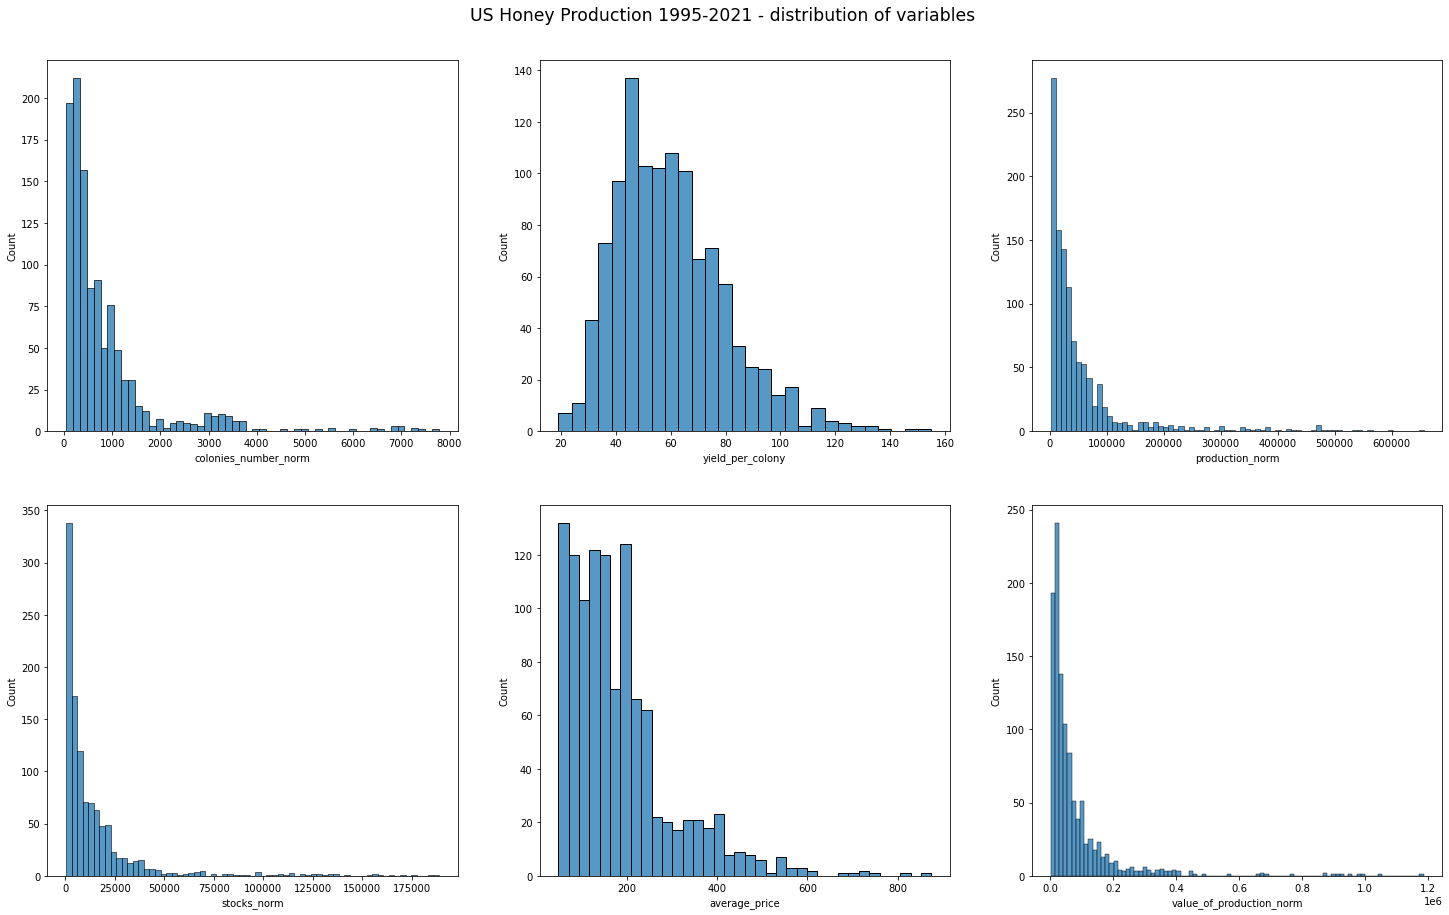

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

fig.suptitle('US Honey Production 1995-2021 - distribution of variables', fontsize='xx-large', y=0.93)

sns.histplot(ax=axes[0, 0], data=df, x='colonies_number_norm')
sns.histplot(ax=axes[0, 1], data=df, x='yield_per_colony')
sns.histplot(ax=axes[0, 2], data=df, x='production_norm')
sns.histplot(ax=axes[1, 0], data=df, x='stocks_norm')
sns.histplot(ax=axes[1, 1], data=df, x='average_price')
sns.histplot(ax=axes[1, 2], data=df, x='value_of_production_norm')

What we can see, is three different types of distribution: 

Yield per colony and average price, both right-skewed, resemble the lognormal distribution.  

The other four variables - colonies number, production, stocks, and value of production - are all shaped like the exponential distribution. Their similarity indicates that their values might depend on each other. We will explore it further.

### Correlations

<AxesSubplot:xlabel='yield_per_colony', ylabel='average_price'>

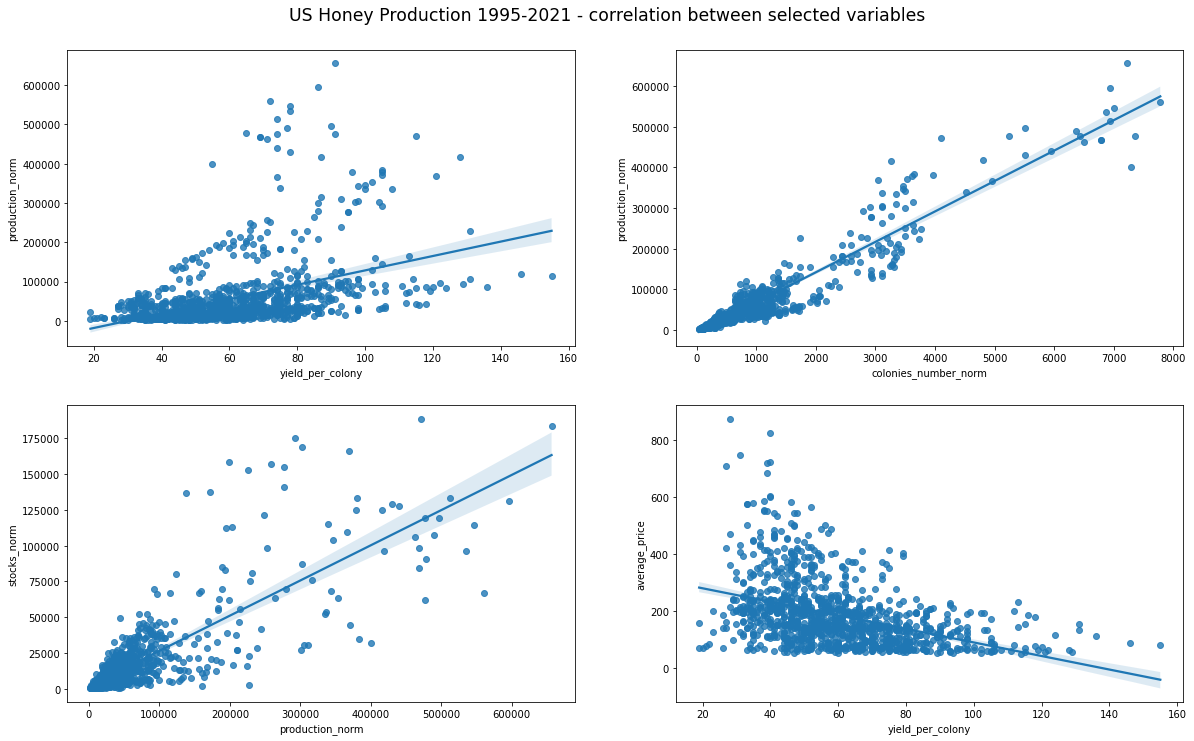

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

fig.suptitle('US Honey Production 1995-2021 - correlation between selected variables', fontsize='xx-large', y=0.93)

sns.regplot(ax=axes[0, 0], data=df, x='yield_per_colony', y='production_norm')
sns.regplot(ax=axes[0, 1], data=df, x='colonies_number_norm', y='production_norm')
sns.regplot(ax=axes[1, 0], data=df,x='production_norm', y='stocks_norm')
sns.regplot(ax=axes[1, 1], data=df, x='yield_per_colony', y='average_price')

Based on these charts we can say that:

- both: the yield per colony and the number of colonies, have a positive correlation with the size of production, but the influence of the number of colonies is much more significant than the influence of the yield per colony, 

- the size of stocks is positively correlated with the production size (states with large production have large stocks and vice versa),

- the average price of honey shows a negative, non-linear correlation with the yield per colony (the higher the yield the lower the price).

### Annual changes

<AxesSubplot:xlabel='year', ylabel='average_price'>

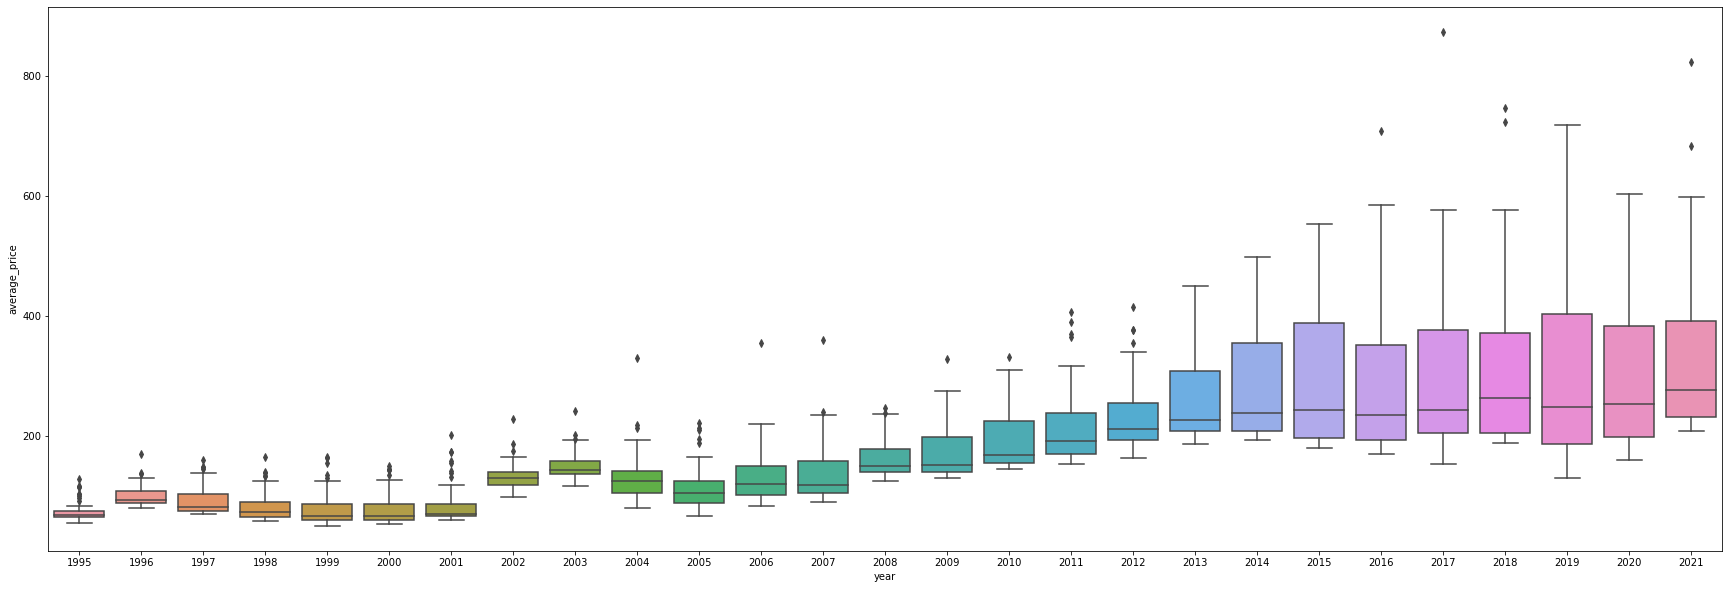

In [17]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df, x='year', y='average_price')

Here we can see that, while fluctuating, the average price of honey has been visibly growing in the last decades. Moreover, the differences in prices between states have been increasing significantly.

At the same time, a slow but steady decrease in honey production can be observed:

<AxesSubplot:xlabel='year', ylabel='production_norm'>

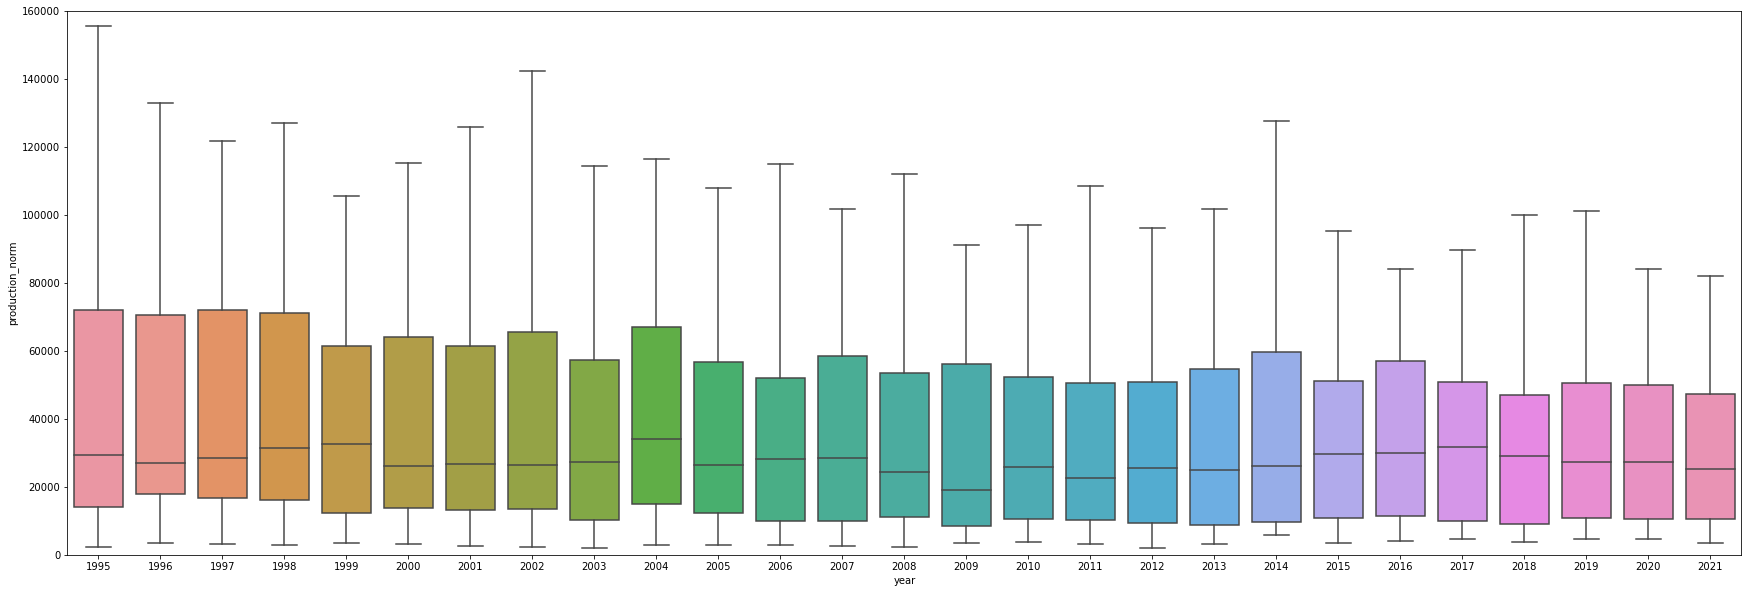

In [18]:
plt.figure(figsize=(30,10))
plt.ylim(0,160000)
sns.boxplot(data=df, x='year', y='production_norm', fliersize=0)

Interestingly, since the number of colonies has been showing a weak but positive trend, the decrease in the amount of honey produced annually results probably from the lowering yield per colony: 

<AxesSubplot:xlabel='year', ylabel='colonies_number_norm'>

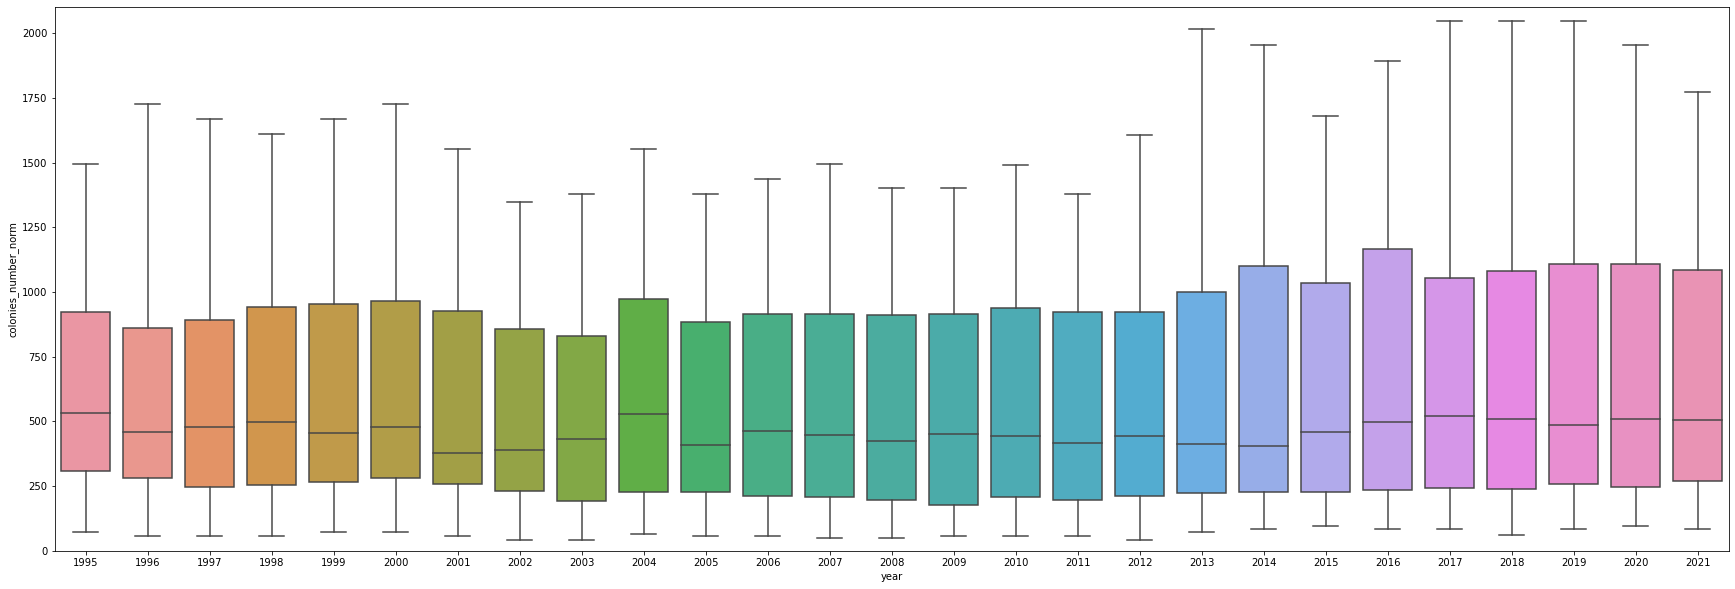

In [19]:
plt.figure(figsize=(30,10))
plt.ylim(0,2100)
sns.boxplot(data=df, x='year', y='colonies_number_norm', fliersize=0)

<AxesSubplot:xlabel='year', ylabel='yield_per_colony'>

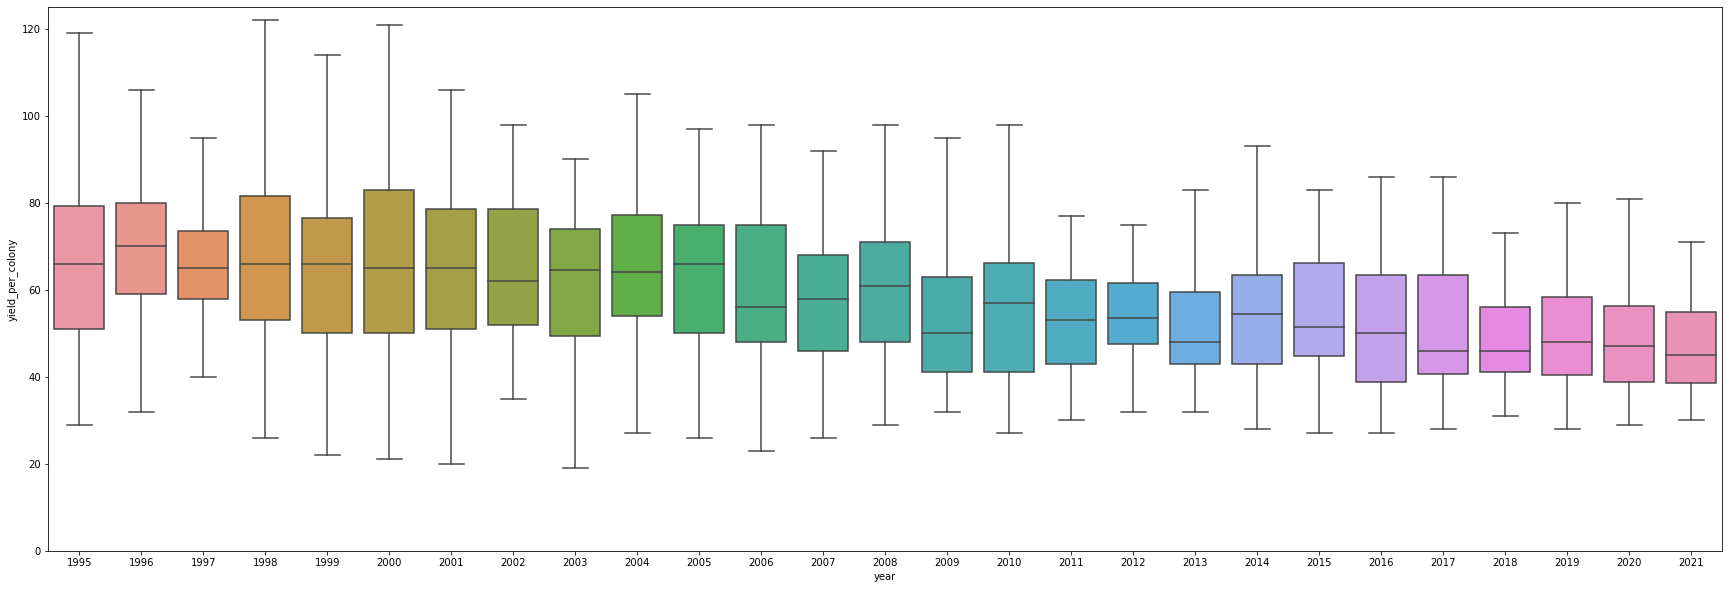

In [20]:
plt.figure(figsize=(30,10))
plt.ylim(0,125)
sns.boxplot(data=df, x='year', y='yield_per_colony', fliersize=0)

### Honey production across the states and years

In [21]:
# helper function to generate heatmaps from subsets of our data
def get_heatmap(df, var):
    df_heatmap = df.pivot('state', 'year', var)
    plt.figure(figsize=(20,15))
    plt.title(f'{var} value in each state in years 1995-2021')
    sns.heatmap(data=df_heatmap)

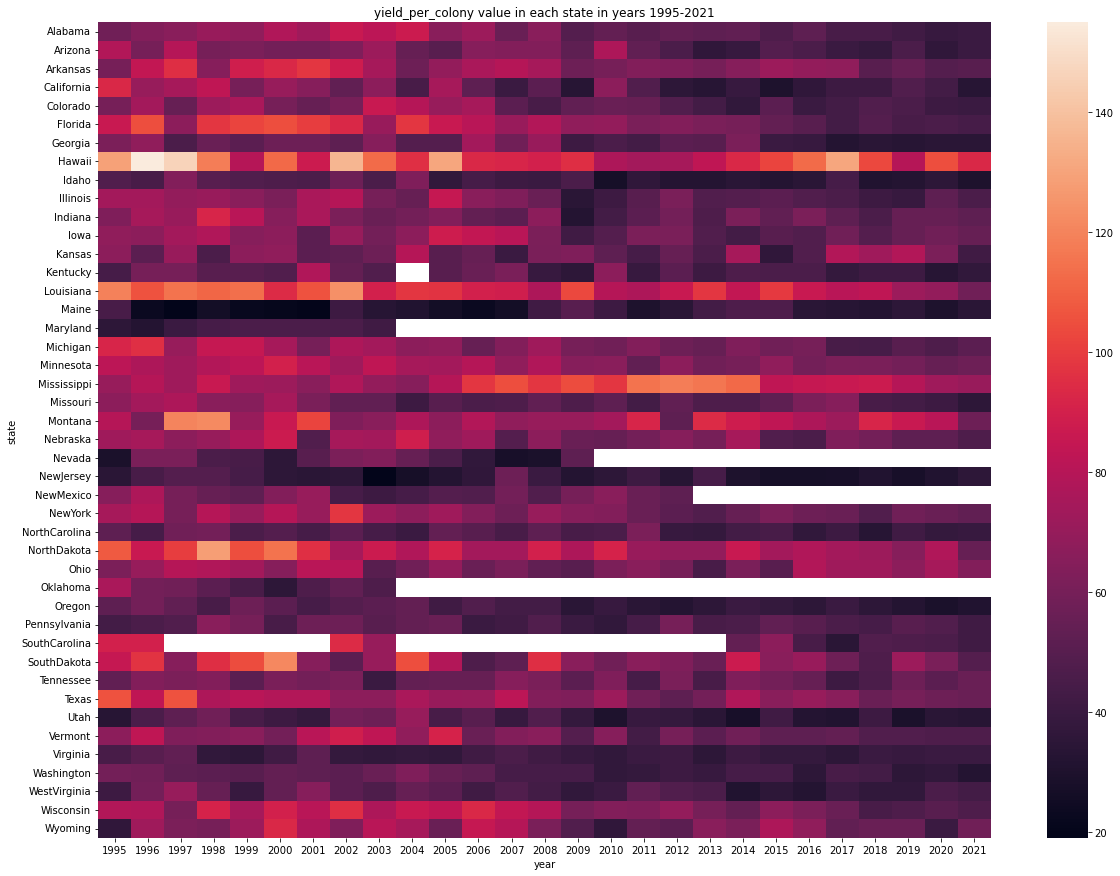

In [22]:
get_heatmap(df, 'yield_per_colony')

As the heatmap gets darker to the right, we can see the decrease in the yield per colony across all the states, which confirms our previous findings.

I will apply a logarithmic transformation to some of the variables to reduce their skewness and increase the readability of the heatmap charts. 

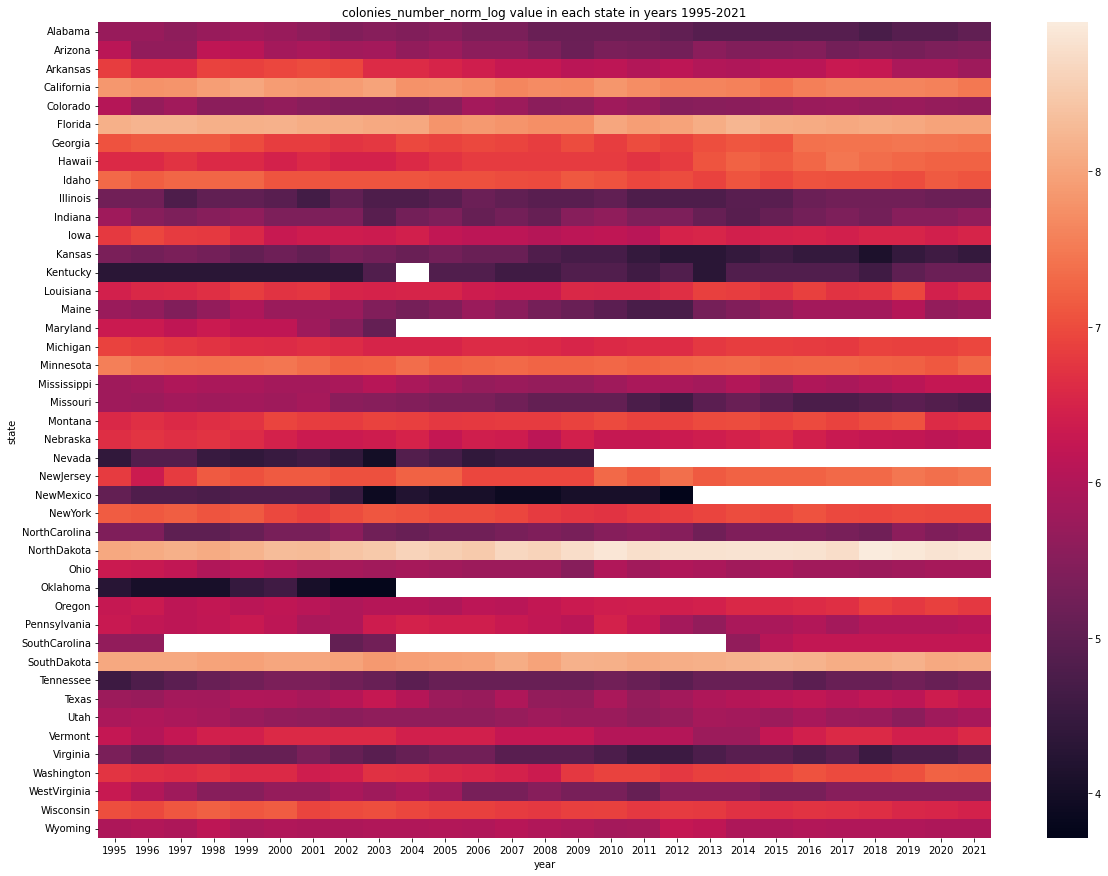

In [23]:
df['colonies_number_norm_log'] = np.log(df['colonies_number_norm'])
get_heatmap(df, 'colonies_number_norm_log')

The number of colonies differs widely between individual states. However, the number of colonies within each state has been changing only slightly throughout the years. 

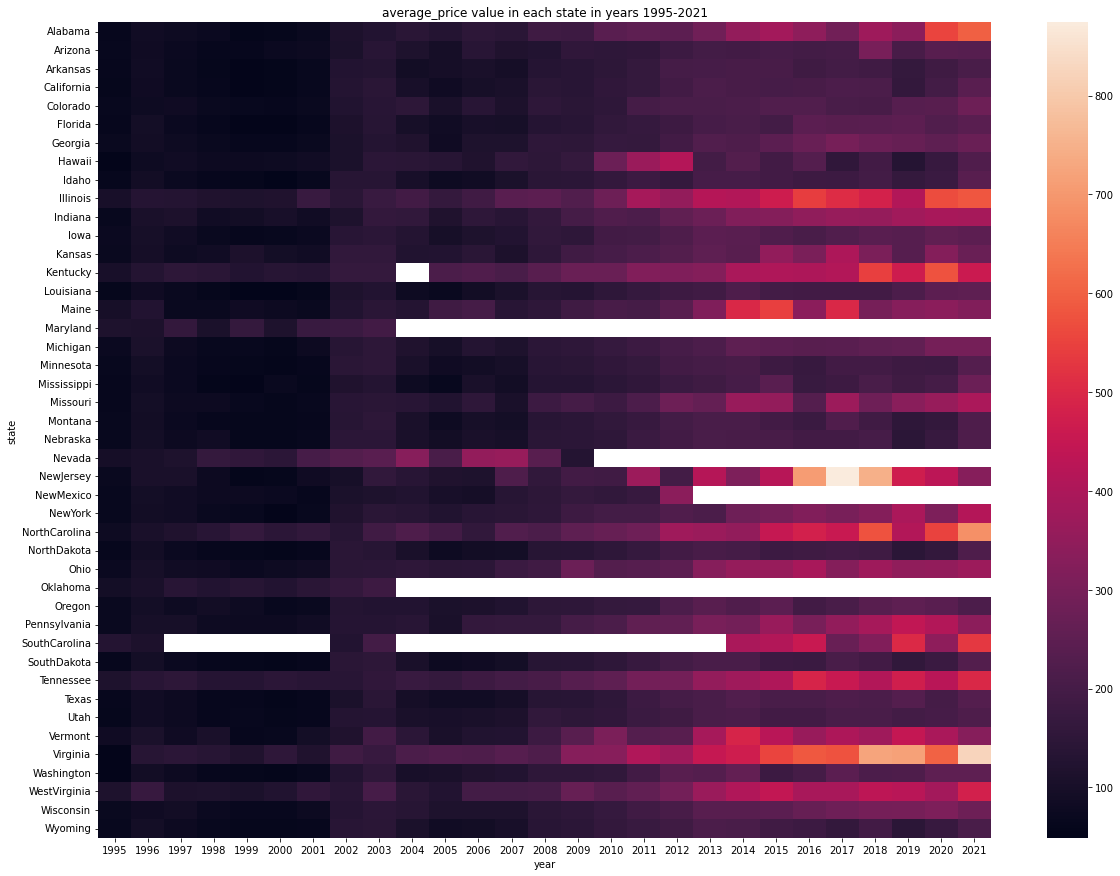

In [24]:
get_heatmap(df, 'average_price')

In the first decade, the average price of honey did not vary much between the states. However, the rise in prices observed between 1995 and 2021 has not been uniform, which results in a growing range of prices for a given year between different states.

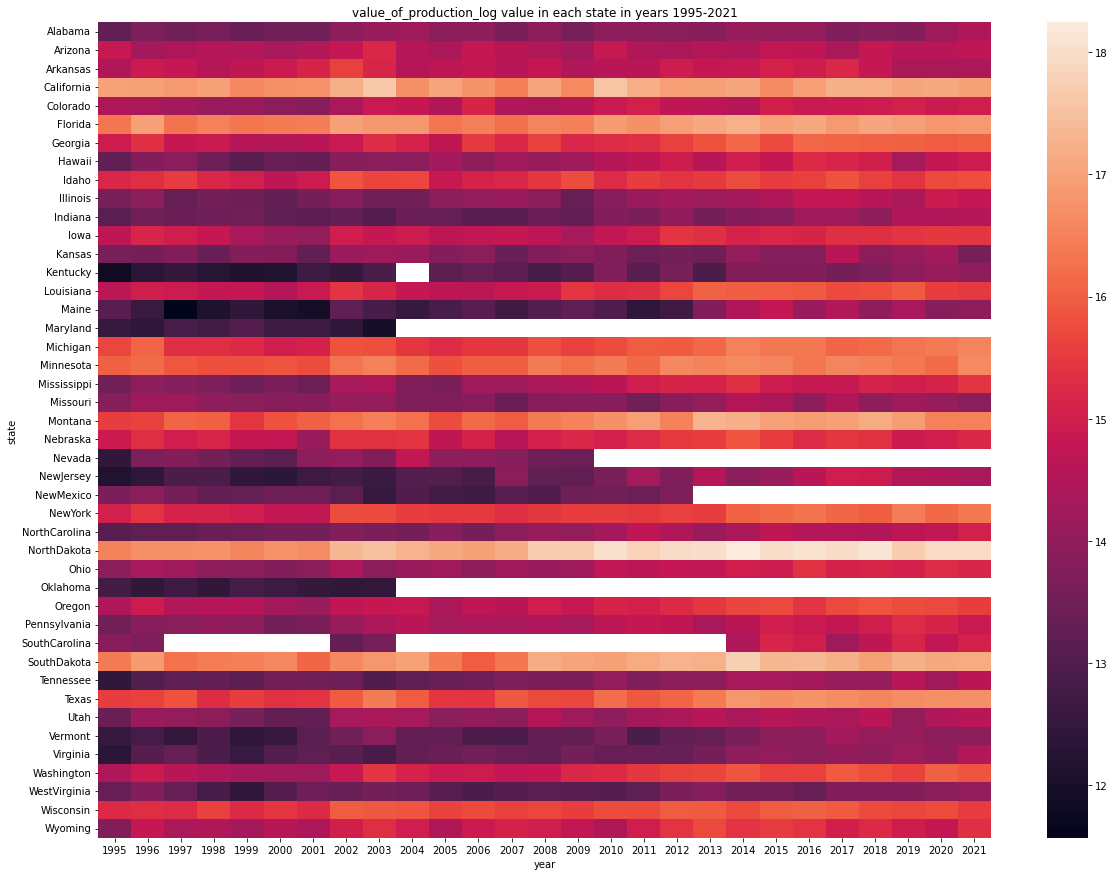

In [25]:
df['value_of_production_log'] = np.log(df['value_of_production'])
get_heatmap(df, 'value_of_production_log')

As we can see above, virtually all the states have recorded growth in the value of honey production in the analyzed period. Given the previous findings, we can infer that it is predominantly due to the rising prices.

## Key messages

### Between 1995 and 2021:

- colonies number stayed roughly the same,

- median __yield per colony dropped__ from 66 to 45 pounds per colony,

- median __average price grew__ from 68 to 276 cents per pound,

- median __annual value of production grew__ from 1.0 to 3.7 million dollars per state,

- price rise compensated for decreasing yield per colony.


### In 2021:

- __North Dakota, South Dakota and Florida__ had the largest value of production per 1000 square miles,

- __Kansas, Missouri and Arizona__ had the smallest value of production per 1000 square miles,

- the most productive bee colonies were in __Hawaii, Mississippi and Ohio,__

- the least productive bee colonies were in __Idaho, Oregon and Washington.__